## Imports

In [2]:
from collections import OrderedDict
from functools import partial
from shapely.geometry import Polygon, Point
import os
import sys
sys.path.insert(1, os.path.realpath(os.path.pardir))
from bbtoolkit.data import Cached
from bbtoolkit.preprocessing.environment.builders import EnvironmentBuilder
from bbtoolkit.preprocessing.environment.compilers import DynamicEnvironmentCompiler
from bbtoolkit.preprocessing.environment.visible_planes import LazyVisiblePlane
from bbtoolkit.structures.geometry import Texture, TexturedPolygon
import matplotlib.pyplot as plt
from bbtoolkit.preprocessing.environment.viz import plot_polygon

## Create Environment

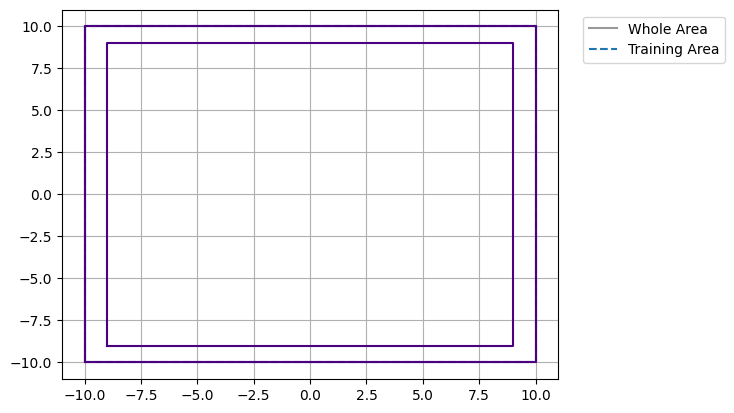

In [3]:
min_xy, max_xy = -10, 10 # create the box of size 20x20
min_train_x, max_train_x, min_train_y, max_train_y = -10, 10, -10, 10 # create the training area of size 20x10
res = 0.2 # set grid resolution

builder = EnvironmentBuilder(
    min_xy,
    max_xy,
    (min_train_x, min_train_y),
    (max_train_x, max_train_y),
    res=res
)
builder.add_wall(
    TexturedPolygon(
        Polygon(
            [
                (-10, -10),
                (-10, 10),
                (10, 10),
                (10, -10)
            ],
            holes=[
                [
                    (-9, -9),
                    (-9, 9),
                    (9, 9),
                    (9, -9)
                ]
            ]
        ),
        texture=Texture(
            1,
            '#4b0082',
            'main_wall'
        )
    )
)
_ = builder.plot()


## Set up the compiler

In [4]:
cache_manager = Cached(cache_storage=OrderedDict(), max_size=10000)
compiler = DynamicEnvironmentCompiler(
    builder,
    partial(
        LazyVisiblePlane,
        cache_manager=cache_manager,
    )
)

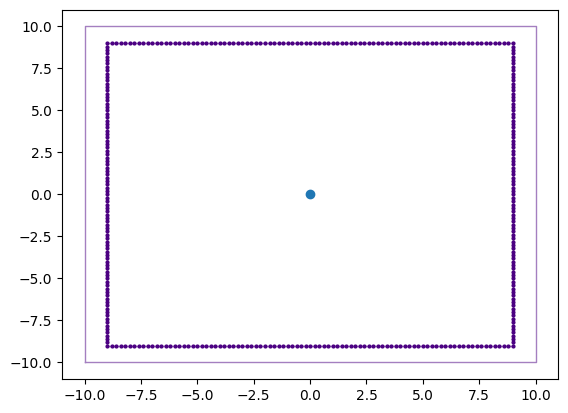

In [20]:
env = compiler.environment

fig, ax = plt.subplots()
position = (0, 0)
for i, obj in enumerate(env.objects + env.walls):
    plot_polygon(obj.polygon, ax=ax, alpha=0.5, linewidth=1)
    ax.plot(
        obj.visible_parts(*position)[:, 0],
        obj.visible_parts(*position)[:, 1],
        'o',
        color=obj.polygon.texture.color,
        markersize=2
    )

ax.plot(
    *position,
    'o'
)

### Add some objects

In [21]:
compiler.add_object(
    # some polygon:
    TexturedPolygon(
        [
            (2, 2),
            (2, 4),
            (4, 4),
            (4, 2)
        ],
        texture=Texture(
            21,
            '#ae03bb',
            'obj_bound_new'
        )
    ),
    TexturedPolygon(
        [
            (-6, 3),
            (-6, 4),
            (-4, 4),
            (-4, 3)
        ],
        texture=Texture(
            21,
            '#ae03bb',
            'obj_bound_new'
        )
    ),
    TexturedPolygon(
        [
            (-3, -3),
            (-3, -1),
            (-1, -1),
            (-1, -3)
        ],
        texture=Texture(
            22,
            '#e435f2',
            'obj_bound_new'
        )
    ),
)

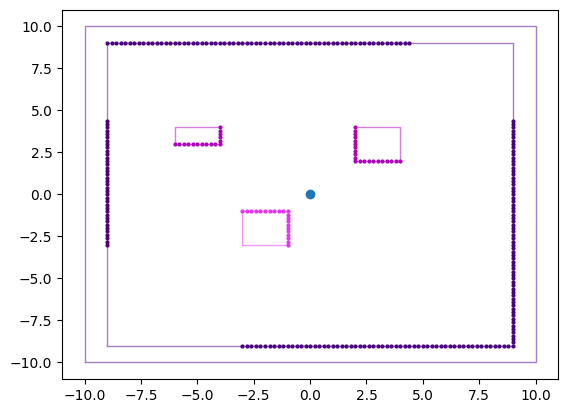

In [22]:
env = compiler.environment

fig, ax = plt.subplots()
position = (0, 0)
for i, obj in enumerate(env.objects + env.walls):
    plot_polygon(obj.polygon, ax=ax, alpha=0.5, linewidth=1)
    ax.plot(
        obj.visible_parts(*position)[:, 0],
        obj.visible_parts(*position)[:, 1],
        'o',
        color=obj.polygon.texture.color,
        markersize=2
    )

ax.plot(
    *position,
    'o'
)

### Remove last object

In [23]:
compiler.remove_object(-1)

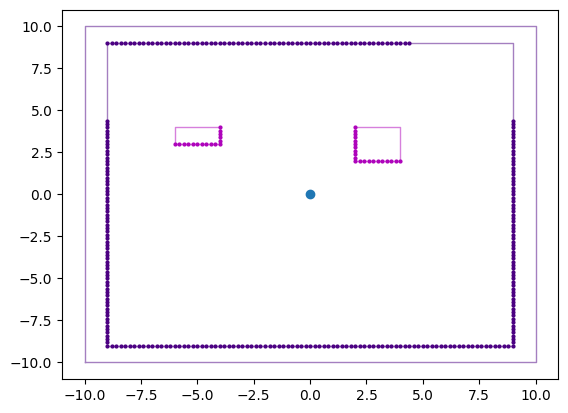

In [24]:
env = compiler.environment

fig, ax = plt.subplots()
position = (0, 0)
for i, obj in enumerate(env.objects + env.walls):
    plot_polygon(obj.polygon, ax=ax, alpha=0.5, linewidth=1)
    ax.plot(
        obj.visible_parts(*position)[:, 0],
        obj.visible_parts(*position)[:, 1],
        'o',
        color=obj.polygon.texture.color,
        markersize=2
    )

ax.plot(
    *position,
    'o'
)

### Add wall

In [28]:
compiler.add_wall(
    TexturedPolygon(
        [
            Point(5, 5),
            Point(5, -5),
            Point(6, -5),
            Point(6, 5)
        ],
        texture=Texture(
            21,
            '#4b0082',
            'wall_bound_new2'
        )
    )
)

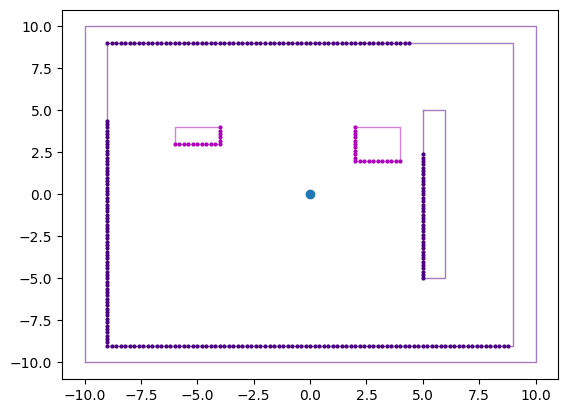

In [29]:
env = compiler.environment

fig, ax = plt.subplots()
position = (0, 0)
for i, obj in enumerate(env.objects + env.walls):
    plot_polygon(obj.polygon, ax=ax, alpha=0.5, linewidth=1)
    ax.plot(
        obj.visible_parts(*position)[:, 0],
        obj.visible_parts(*position)[:, 1],
        'o',
        color=obj.polygon.texture.color,
        markersize=2
    )

ax.plot(
    *position,
    'o'
)